In [40]:
#1
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [41]:
#2
!unzip '/content/face dtection dee learn.zip'

Archive:  /content/face dtection dee learn.zip
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [42]:
#3
fldr = '/content/UTKFace'

In [43]:
#4
import os
flies = os.listdir('/content/UTKFace')

In [44]:
#5
ages=[]
genders=[]
images=[]

In [45]:
#6
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

Streaming output truncated to the last 5000 lines.
/content/UTKFace/75_0_2_20170112224347901.jpg.chip.jpg
/content/UTKFace/24_1_3_20170119170600774.jpg.chip.jpg
/content/UTKFace/5_1_0_20170109192114580.jpg.chip.jpg
/content/UTKFace/30_1_2_20170104192931704.jpg.chip.jpg
/content/UTKFace/26_1_0_20170116164911648.jpg.chip.jpg
/content/UTKFace/45_1_3_20170119194342179.jpg.chip.jpg
/content/UTKFace/9_1_0_20170109204626343.jpg.chip.jpg
/content/UTKFace/65_0_1_20170120223824820.jpg.chip.jpg
/content/UTKFace/23_1_3_20170119164425613.jpg.chip.jpg
/content/UTKFace/50_0_3_20170119202107229.jpg.chip.jpg
/content/UTKFace/28_0_0_20170116223051730.jpg.chip.jpg
/content/UTKFace/34_0_0_20170117182731575.jpg.chip.jpg
/content/UTKFace/58_0_0_20170117191921441.jpg.chip.jpg
/content/UTKFace/26_1_1_20170117163837655.jpg.chip.jpg
/content/UTKFace/28_1_2_20170116164556009.jpg.chip.jpg
/content/UTKFace/50_0_1_20170113173649243.jpg.chip.jpg
/content/UTKFace/1_0_2_20170109192102236.jpg.chip.jpg
/content/UTKFace/

#
Create List of Age and Gender from the dataset

In [46]:
#7
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

# view sample

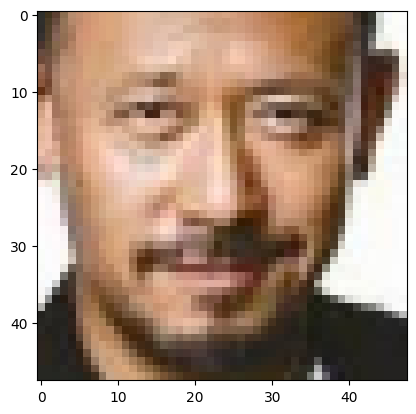

In [47]:
#8
plt.imshow(images[87])

In [48]:
#9
print(ages[87])

40


In [49]:
#10
print(genders[87])

0


#
Saving images array,ages array, and genders array in the system

In [50]:
#11
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [51]:
#12
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

#Finding the no. of Male and Female samples respectively

In [52]:
#13
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


Plotting the No. of Male and Female Samples

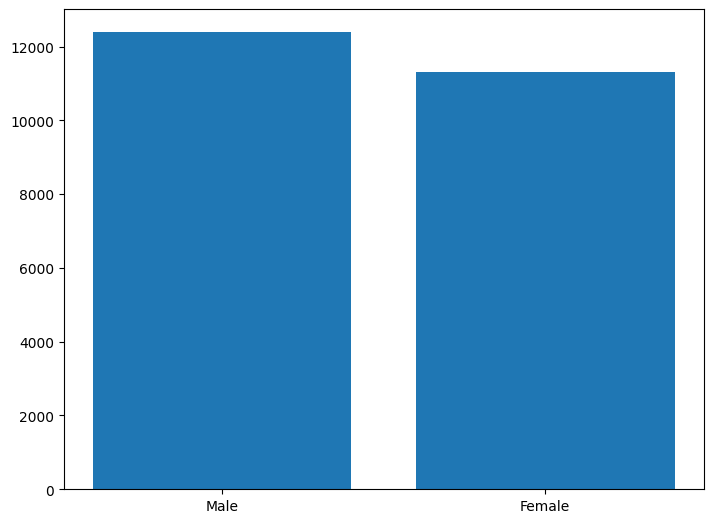

In [53]:
#14
fig=plt.figure()
plt.figure.figsize=(3,5)
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()


# Finding The no. of samples in each age

In [54]:
#15
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


# Converting Age counts to lists

In [55]:
#16
val=values.tolist()
cnt=counts.tolist()

# Plotting The Samples Agewise

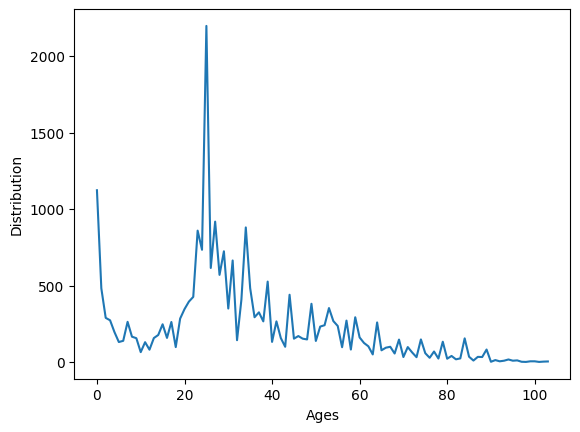

In [56]:
#17
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

# Definig Labes for Output

In [57]:
#18
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

#
Creating another list of images from existing one
For better learning

In [58]:
#19
images_f_2=images_f/255

In [59]:
#20
images_f_2.shape

(23708, 48, 48, 3)

In [60]:
#21
labels_f=np.array(labels)

#Splitting The Dataset into test and train

In [61]:
#22
from sklearn.model_selection import train_test_split

In [62]:
#23
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)


In [64]:
#24
Y_train[0:5]

array([[ 4,  0],
       [18,  1],
       [89,  0],
       [87,  0],
       [ 8,  0]])

#
Splitting 'Y_test' and 'Y_train' further
For better understanding

In [65]:
#25
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [66]:
#26
Y_train_2[0][0:5]

array([0, 1, 0, 0, 0])

In [67]:
#27
Y_train_2[1][0:5]

array([ 4, 18, 89, 87,  8])

# Defining the Model

In [68]:
#28
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [69]:
#29
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=[['accuracy'], ['accuracy']])
    return model


In [70]:
#30
model=model((48,48,3))

In [71]:
#31
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 48, 48, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 48, 48, 32)     │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 48, 48, 32)     │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activation) │ (None, 48, 48, 32)     │              0 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 24, 24, 32)     │              0 │ activation_4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 24, 24, 64)     │         18,496 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 24, 24, 64)     │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_5 (Activation) │ (None, 24, 24, 64)     │              0 │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 12, 12, 64)     │              0 │ activation_5[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 12, 12, 128)    │         73,856 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 12, 12, 128)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_6 (Activation) │ (None, 12, 12, 128)    │              0 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 6, 6, 128)      │              0 │ activation_6[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 6, 6, 256)      │        295,168 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 6, 6, 256)      │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_7 (Activation) │ (None, 6, 6, 256)      │              0 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 3, 3, 256)      │              0 │ activation_7[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
#32
from tensorflow.keras.callbacks import ModelCheckpoint

#
Initializing the Model

In [73]:
#33
fle_s = 'Age_Sex_Detection.keras'  # ✅ Use .keras instead of .h5
checkpoint = ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

Early_stop = tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss', restore_best_weights=True)
callback_list = [checkpoint, Early_stop]


#
Running the Model
This will take some time

In [ ]:
#34
History = model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=100)

Epoch 1/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 172s 619ms/step - age_out_accuracy: 0.0464 - age_out_loss: 15.9412 - loss: 16.8337 - sex_out_accuracy: 0.5184 - sex_out_loss: 0.7049 - val_age_out_accuracy: 0.0466 - val_age_out_loss: 13.8791 - val_loss: 14.7597 - val_sex_out_accuracy: 0.5202 - val_sex_out_loss: 0.6852
Epoch 2/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 200s 613ms/step - age_out_accuracy: 0.0484 - age_out_loss: 13.4430 - loss: 14.3017 - sex_out_accuracy: 0.5972 - sex_out_loss: 0.6660 - val_age_out_accuracy: 0.0402 - val_age_out_loss: 14.7724 - val_loss: 15.6443 - val_sex_out_accuracy: 0.7152 - val_sex_out_loss: 0.6070
Epoch 3/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 203s 618ms/step - age_out_accuracy: 0.0430 - age_out_loss: 10.7729 - loss: 11.6100 - sex_out_accuracy: 0.7182 - sex_out_loss: 0.5707 - val_age_out_accuracy: 0.0442 - val_age_out_loss: 13.5887 - val_loss: 14.4423 - val_sex_out_accuracy: 0.7444 - val_sex_out_loss: 0.5422
Epoch 4/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 192s 584ms/step - age_out_

# model evaluation

In [ ]:
#35
Model.evaluate(X_test,Y_test_2)

In [ ]:
#36
pred=Model.predict(X_test)

In [ ]:
#37
pred[1]

# plotting loss

In [ ]:
#38
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


# plotting sex accuracy

In [ ]:
#39
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


# plotting gender accuracy

In [ ]:
#40
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

# making report of the model

In [ ]:
#41
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1


In [ ]:
#42
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#43
report=classification_report(Y_test_2[0],Pred_l)

In [ ]:
#44
print(report)

# making heatmap of the model

In [ ]:
#45
results=confusion_matrix(Y_test_2[0],Pred_l)

In [ ]:
#46
import seaborn as sns
sns.heatmap(results,annot=True)

# testing the image ourself

In [ ]:
#47
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

#test 1

In [ ]:
#48
test_image(4,images_f,images_f_2,Model)

# test2

In [ ]:
#49
test_image(23,images_f,images_f_2,Model)

# test3

In [ ]:
#50
test_image(168,images_f,images_f_2,Model)